**Data Exploration sama preprocessing ambil dari tugas clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

In [ ]:
kendaraan = pd.read_csv("kendaraan_train.csv")
kendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# ISI SENDIRI DATA EXPLORATION AMA PRE PROCESSING

## Data Exploration

In [ ]:
print("Data size before preprocessing: ",len(kendaraan))
print("Empty Datas :")
kendaraan.isnull().sum()

Data size before preprocessing:  285831
Empty Datas :


id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
kendaraan.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
kendaraan.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


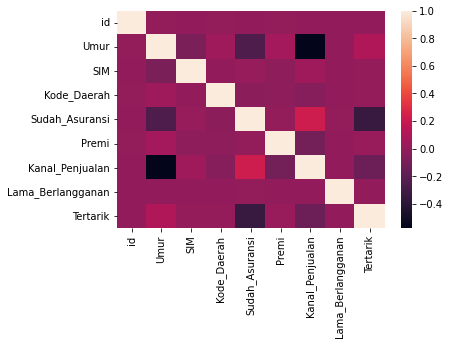

In [ ]:
sns.heatmap(kendaraan.corr())

## Pre Processing

Changing all data to be numerical. If the data types is an enum, then return the index values of each enum.

In [ ]:
def toNumeric(dataset) :
  tmp = dataset.copy()
  listcol = list(tmp.columns)
  datatypecol = dict(tmp.dtypes)
  variasi = []
  for x in listcol:
    if datatypecol.get(x) == "object" :
      variasi.append((x,list(dataset.groupby(x).groups.keys())))
  for x in variasi:
    #tmp[x[0]] = tmp[x[0]].replace([])
    for i in x[1] :
      idx = x[1].index(i)
      tmp[x[0]] = tmp[x[0]].replace([i],idx)

  return tmp

numerick = toNumeric(kendaraan)
numerick.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1.0,30.0,1.0,33.0,1.0,1.0,1.0,28029.0,152.0,97.0,0
1,2,0.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,1.0,1.0,32733.0,160.0,119.0,0
3,4,1.0,58.0,1.0,48.0,0.0,0.0,1.0,2630.0,124.0,63.0,0
4,5,0.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0


Creating a list of column that if there is a NaN value in this column then don't drop the row

In [ ]:
def DoNotDropList(dataset):
  dropnanlist = []
  datatypecol = dict(dataset.dtypes)
  listcol = list(dataset.columns)
  for x in listcol:
    ngroup = dataset.groupby(x).ngroups
    if ngroup > 5:
      dropnanlist.append(x)
  return dropnanlist
  
nodrop = DoNotDropList(numerick) 
print(nodrop)

['id', 'Umur', 'Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']


From the function above, we use it here. Calculate the skewness of each column then if the skewness of the column is between 2 and -2, then calculate the mean of the column and fill the empty data with it. Else, calculate the median of the column and fill the empty data with it.

In [ ]:
def FillNanSkew(dataset):
  dndlist = DoNotDropList(dataset)
  skew = dataset[dndlist].skew(axis=0, skipna=True)
  #skewness > 2 or < -2 = median
  #else mean
  for i in range(len(skew)):
    if skew[i] > -2 and skew[i] < 2 :
      dataset[dndlist[i]].fillna(dataset[dndlist[i]].mean(),inplace=True)
    else:
      dataset[dndlist[i]].fillna(dataset[dndlist[i]].median(),inplace=True)
  return dataset


This function is the opposite of the function above. If the column type is enum and the data is empty then drop the row

In [ ]:
def DropNan(dataset):
  droplist = []
  datatypecol = dict(dataset.dtypes)
  listcol = list(dataset.columns)
  for x in listcol:
    ngroup = dataset.groupby(x).ngroups
    if ngroup <= 5:
      dataset = dataset[dataset[x].notna()]
  return dataset

print(DropNan(numerick))  

            id  Jenis_Kelamin  ...  Lama_Berlangganan  Tertarik
0            1            1.0  ...               97.0         0
1            2            0.0  ...              158.0         0
3            4            1.0  ...               63.0         0
5            6            0.0  ...              171.0         0
8            9            1.0  ...               31.0         0
...        ...            ...  ...                ...       ...
285826  285827            1.0  ...              217.0         0
285827  285828            1.0  ...               50.0         0
285828  285829            1.0  ...              226.0         0
285829  285830            0.0  ...              270.0         0
285830  285831            0.0  ...               44.0         0

[221026 rows x 12 columns]


In [ ]:
def MinMaxScalar(dataset):
  return (dataset - dataset.min()) / (dataset.max() - dataset.min())

MinMaxScalar(numerick)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.047251,0.932099,0.301038,0.0
1,0.000003,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.043104,0.172840,0.512111,0.0
2,0.000007,NaN,0.015385,1.0,0.884615,1.0,0.5,1.0,0.056002,0.981481,0.377163,0.0
3,0.000010,1.0,0.584615,1.0,0.923077,0.0,0.0,1.0,0.000000,0.759259,0.183391,0.0
4,0.000014,0.0,0.461538,1.0,0.673077,0.0,1.0,NaN,0.059953,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,0.999986,1.0,0.046154,1.0,0.076923,1.0,0.5,1.0,0.043454,0.932099,0.716263,0.0
285827,0.999990,1.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.078239,0.932099,0.138408,0.0
285828,0.999993,1.0,0.046154,1.0,0.961538,1.0,0.5,1.0,0.087661,0.932099,0.747405,0.0
285829,0.999997,0.0,0.738462,1.0,0.134615,1.0,0.0,1.0,0.051853,0.759259,0.899654,0.0


All of those above will be compiled into 1 function.

In [ ]:
def PreProcessing(dataset,dtype=int,minmax=True):
  
  try:
    dataset = dataset.drop(columns=['id']) #drop the id column
  except:
    dataset = dataset
  dataset = toNumeric(dataset)        #changing enum value to their index
  dataset = FillNanSkew(dataset)      #Fill the NaN values
  dataset = DropNan(dataset)          #Drop the row if the data was enum
  dataset = dataset.astype(dtype)
  if minmax:
    dataset = MinMaxScalar(dataset)
  dataset = dataset.drop_duplicates() #drop duplicate values
  return dataset

prep = PreProcessing(kendaraan)
print("Data size before preprocessing: ",len(kendaraan))
print("Empty Datas :")
print(kendaraan.isnull().sum())
print(prep.info())
prep.describe()

Data size before preprocessing:  285831
Empty Datas :
id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 220837 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      220837 non-null  float64
 1   Umur               220837 non-null  float64
 2   SIM                220837 non-null  float64
 3   Kode_Daerah        220837 non-null  float64
 4   Sudah_Asuransi     220837 non-null  float64
 5   Umur_Kendaraan     220837 non-null  float64
 6   Kendaraan_Rusak    220837 non-null  float64
 7   Premi              220837 non-null  float64
 8   Kan

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000
mean,0.459656,0.289144,0.997867,0.507458,0.459221,0.258569,0.495433,0.051935,0.685879,0.498835,0.121963
std,0.498371,0.232982,0.046133,0.248344,0.498335,0.288813,0.499980,0.031014,0.325898,0.282916,0.327244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.076923,1.000000,0.288462,0.000000,0.000000,0.000000,0.041484,0.333333,0.259516,0.000000
50%,0.000000,0.276923,1.000000,0.538462,0.000000,0.000000,0.000000,0.052666,0.759259,0.498270,0.000000
75%,1.000000,0.446154,1.000000,0.673077,1.000000,0.500000,1.000000,0.067387,0.932099,0.737024,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split data between train and test data

In [ ]:
def DataSplit(dataset,frac):
  train=dataset.sample(frac=0.8,random_state=rand.randint(0,dataset.shape[0])) #random state is a seed value
  test=dataset.drop(train.index)
  return train,test

datatrain,datatest = DataSplit(prep,0.8)

In [ ]:
datatrain

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
224784,0.0,0.030769,1.0,0.346154,0.0,0.5,0.0,0.053980,0.932099,0.190311,1.0
229693,1.0,0.046154,1.0,0.538462,1.0,0.5,1.0,0.080460,0.932099,0.878893,0.0
163515,0.0,0.861538,1.0,0.538462,1.0,0.0,1.0,0.106358,0.759259,0.072664,0.0
18714,0.0,0.430769,1.0,0.423077,0.0,1.0,0.0,0.053941,0.746914,0.311419,1.0
270240,0.0,0.846154,1.0,0.134615,0.0,1.0,0.0,0.105781,0.154321,0.134948,0.0
...,...,...,...,...,...,...,...,...,...,...,...
81448,1.0,0.369231,1.0,0.500000,0.0,0.0,0.0,0.057873,0.154321,0.501730,0.0
187409,0.0,0.046154,1.0,0.730769,0.0,0.5,0.0,0.000000,0.956790,0.484429,0.0
102999,1.0,0.261538,1.0,0.903846,0.0,0.0,0.0,0.042593,0.759259,0.148789,0.0
285710,0.0,0.446154,1.0,0.673077,1.0,0.0,1.0,0.000000,0.759259,0.020761,0.0


In [ ]:
datatest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
1,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.043104,0.172840,0.512111,0.0
11,1.0,0.276923,1.0,0.538462,1.0,0.5,1.0,0.070924,0.932099,0.692042,0.0
14,0.0,0.707692,1.0,0.461538,1.0,0.0,1.0,0.066946,0.888889,0.937716,0.0
15,0.0,0.169231,1.0,0.153846,0.0,0.5,0.0,0.000000,0.932099,0.422145,0.0
17,1.0,0.030769,1.0,0.288462,0.0,0.5,0.0,0.066338,0.932099,0.743945,0.0
...,...,...,...,...,...,...,...,...,...,...,...
285789,0.0,0.030769,1.0,0.288462,1.0,0.5,0.0,0.054428,0.981481,0.103806,0.0
285798,1.0,0.030769,1.0,0.538462,0.0,0.5,0.0,0.059855,0.685185,0.519031,0.0
285799,0.0,0.461538,1.0,0.538462,0.0,0.0,0.0,0.073854,0.759259,0.411765,0.0
285813,0.0,0.046154,1.0,0.288462,0.0,0.5,0.0,0.049881,0.981481,0.159170,0.0


# PENTING! Pisahin kolom tertarik di data contohnya kyk gini

Split dataset(X) and target(Y) and convert to Array

In [ ]:
def SplitXY(dataset,label):
  target = dataset[[label]]
  return dataset.drop(columns=[label]), target

dt_x,dt_y = SplitXY(datatrain,"Tertarik")

In [ ]:
dt_x

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
224784,0.0,0.030769,1.0,0.346154,0.0,0.5,0.0,0.053980,0.932099,0.190311
229693,1.0,0.046154,1.0,0.538462,1.0,0.5,1.0,0.080460,0.932099,0.878893
163515,0.0,0.861538,1.0,0.538462,1.0,0.0,1.0,0.106358,0.759259,0.072664
18714,0.0,0.430769,1.0,0.423077,0.0,1.0,0.0,0.053941,0.746914,0.311419
270240,0.0,0.846154,1.0,0.134615,0.0,1.0,0.0,0.105781,0.154321,0.134948
...,...,...,...,...,...,...,...,...,...,...
81448,1.0,0.369231,1.0,0.500000,0.0,0.0,0.0,0.057873,0.154321,0.501730
187409,0.0,0.046154,1.0,0.730769,0.0,0.5,0.0,0.000000,0.956790,0.484429
102999,1.0,0.261538,1.0,0.903846,0.0,0.0,0.0,0.042593,0.759259,0.148789
285710,0.0,0.446154,1.0,0.673077,1.0,0.0,1.0,0.000000,0.759259,0.020761


In [ ]:
dt_y

,Tertarik
224784,1.0
229693,0.0
163515,0.0
18714,1.0
270240,0.0
...,...
81448,0.0
187409,0.0
102999,0.0
285710,0.0


In [ ]:
def DatasetTargetToArray(dataset,label_target=None):
  if label_target != None:
    arr_x, arr_y = SplitXY(dataset,label_target)
    arr_y = arr_y.transpose()
    return arr_x.to_numpy(), arr_y.to_numpy()[0]
  else: return dataset.to_numpy()


In [ ]:
train, train_target = DatasetTargetToArray(datatrain,'Tertarik')
test, test_target = DatasetTargetToArray(datatest,'Tertarik')

In [ ]:
train

array([[0.        , 0.03076923, 1.        , ..., 0.05397974, 0.93209877,
        0.19031142],
       [1.        , 0.04615385, 1.        , ..., 0.08045988, 0.93209877,
        0.87889273],
       [0.        , 0.86153846, 1.        , ..., 0.10635773, 0.75925926,
        0.07266436],
       ...,
       [1.        , 0.26153846, 1.        , ..., 0.04259258, 0.75925926,
        0.14878893],
       [0.        , 0.44615385, 1.        , ..., 0.        , 0.75925926,
        0.02076125],
       [0.        , 0.27692308, 1.        , ..., 0.06540597, 0.93209877,
        0.34948097]])

In [ ]:
train_target

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
arr = DatasetTargetToArray(prep)
arr

array([[1.        , 0.15384615, 1.        , ..., 0.93209877, 0.30103806,
        0.        ],
       [0.        , 0.43076923, 1.        , ..., 0.17283951, 0.51211073,
        0.        ],
       [1.        , 0.58461538, 1.        , ..., 0.75925926, 0.183391  ,
        0.        ],
       ...,
       [1.        , 0.04615385, 1.        , ..., 0.93209877, 0.74740484,
        0.        ],
       [0.        , 0.73846154, 1.        , ..., 0.75925926, 0.89965398,
        0.        ],
       [0.        , 0.38461538, 1.        , ..., 0.15432099, 0.11764706,
        0.        ]])

#PEMODELAN

## PILIHAN, pilih salahsatu model aja

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
cls = DecisionTreeClassifier(criterion="entropy")
cls.fit(train,train_target)

DecisionTreeClassifier(criterion='entropy')

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(train,train_target)

LogisticRegression()

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
cls = LinearRegression()
cls.fit(train,train_target)

LinearRegression()

### Linear SVM

In [ ]:
from sklearn import svm
#SVM Linear Classifier
cls = svm.SVC(kernel='linear') #Linear
cls.fit(train,train_target)

SVC(kernel='linear')

### SVM pake kernel RBF (41 menit sekali run)

In [ ]:
#SVM RBF Classifier
cls = svm.SVC(kernel='rbf') # RBF Kernel
cls.fit(train,train_target)

SVC()

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls.fit(train,train_target)

GaussianNB()

### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(train,train_target)

MultinomialNB()

## Untuk Predict

In [ ]:
predict_target = cls.predict(test)
predict_target

array([0., 0., 0., ..., 0., 0., 0.])

#Evaluation

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target,predict_target)
cm

array([[34812,  3962],
       [ 3762,  1631]])

In [ ]:
#percentage
(cm/np.sum(cm))*100

array([[78.81902778,  8.97049834],
       [ 8.51767156,  3.69280232]])

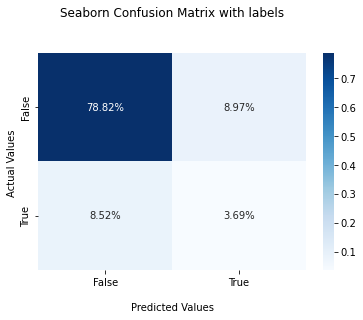

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True']) #bisa positive negative
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("True Negative  :" , TN) 
print("False Negative :" , FN)
print("True Positive  :" , TP)
print("False Positive :" , FP)

True Negative  : 34812
False Negative : 3762
True Positive  : 1631
False Positive : 3962


## Scores

bisa pake ini

In [ ]:
FPR = FP/(FP+TN)
FNR = FN/(FN+TP)
TNR = TN/(TN+FP)
TPR = TP/(TP+FN)
ACC = ((TP + TN)/(TP+TN+FP+FN)) 
PCR = TP/(TP+FP)
#F1S = round( (2/((1/PCR)+(1/ACC))) * 100, 2)
F1S = 2/((1/PCR)+(1/ACC))
JAC = (TN/(TN+FP+FN))+(TP/(TP+FN+FP))

bisa pake cara library

In [ ]:
from sklearn import metrics
TPR = metrics.recall_score(test_target,predict_target)
ACC = metrics.accuracy_score(test_target,predict_target)
F1S = metrics.f1_score(test_target,predict_target)
PCR = metrics.precision_score(test_target,predict_target)
JAC = metrics.jaccard_score(test_target,predict_target)

yang wajib di ambil accuracy sama precision

In [ ]:
print("False Positive Rate  :" , FPR)
print("False Negative Rate :" , FNR)
print("True Negative Rate :" , TNR)
print("True Positive Rate (Recall) :" , TPR) #TPR dan Recall sama
print("Accuracy  :", ACC)
print("Precision :", PCR)
print("F1 Score  :", F1S)
print("Jaccard Score  :", JAC)

False Positive Rate  : 0.10218187445195234
False Negative Rate : 0.6975709252735027
True Negative Rate : 0.8978181255480476
True Positive Rate (Recall) : 0.3024290747264973
Accuracy  : 0.8251183009939548
Precision : 0.29161451814768463
F1 Score  : 0.296923356999818
Jaccard Score  : 0.1743452699091395


#Eksperimen terserah